<a href="https://colab.research.google.com/github/hafsabukhary/TRS_AntColony/blob/main/TRS_with_Ant_Colony_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#to calculate distance of two points
"""Define a function distance that calculates the Euclidean distance between two points in 3D space using the formula sqrt((x1 - x2)^2 + (y1 - y2)^2 + (z1 - z2)^2)
"""
def distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2))

"""
Alpha (α):

Alpha controls the influence of pheromone levels on ant decisions. It determines how much the ants are attracted to paths with higher pheromone levels.
A higher value of alpha places more emphasis on exploiting known paths (those with higher pheromone levels) rather than exploring new paths.
A lower value of alpha leads to a more explorative behavior, allowing ants to consider a wider range of paths.

Beta (β):
Beta governs the influence of the heuristic information, usually based on distance, on ant decisions.
A higher value of beta gives more weight to the heuristic information, meaning ants are more likely to choose shorter paths.
A lower value of beta gives more weight to pheromone levels, making the algorithm more likely to explore paths with higher pheromone content.

Evaporation Rate:

The evaporation rate determines how quickly the pheromone levels decrease over time.
A higher evaporation rate results in faster decay of pheromone levels, making the algorithm converge more quickly to a suboptimal solution.
A lower evaporation rate allows pheromone levels to persist longer, promoting exploration and preventing premature convergence.
In summary, alpha and beta balance the trade-off between exploitation (following paths with higher pheromone levels or shorter distances) and exploration (trying out new paths). The evaporation rate controls the rate at which pheromone levels decrease over time, affecting the overall convergence and exploration behavior of the algorithm. The optimal values for these parameters depend on the specific problem being solved and often require experimentation and tuning to achieve the best results.

 Q:
the constant "Q" represents a parameter that affects the amount of pheromone deposited on paths by the ants during their traversal.
"""
def ant_colony_optimization(points, n_ants, n_iterations, alpha, beta, evaporation_rate, Q):
    n_points = len(points)
    pheromone = np.ones((n_points, n_points))
    best_path = None
    best_path_length = np.inf

    for iteration in range(n_iterations):
        paths = []
        path_lengths = []

        for ant in range(n_ants):
            visited = [False]*n_points
            current_point = np.random.randint(n_points)
            visited[current_point] = True
            path = [current_point]
            path_length = 0

            #For each ant, initialize variables for tracking visited points, the current point, and path details.
            while False in visited:
                unvisited = np.where(np.logical_not(visited))[0]
                probabilities = np.zeros(len(unvisited))
                #While there are unvisited points, identify unvisited points and
                #create an array to store the probabilities of selecting each unvisited point based on pheromone
                for i, unvisited_point in enumerate(unvisited):
                    probabilities[i] = pheromone[current_point, unvisited_point]**alpha / distance(points[current_point], points[unvisited_point])**beta

                probabilities /= np.sum(probabilities)

                next_point = np.random.choice(unvisited, p=probabilities)
                path.append(next_point)
                path_length += distance(points[current_point], points[next_point])
                visited[next_point] = True
                current_point = next_point

            paths.append(path)
            path_lengths.append(path_length)
            #Update the best path and its length if a shorter path is found
            if path_length < best_path_length:
                best_path = path
                best_path_length = path_length
        #Update the Pheromone levels
        pheromone *= evaporation_rate

        for path, path_length in zip(paths, path_lengths):
            for i in range(n_points-1):
                pheromone[path[i], path[i+1]] += Q/path_length
            pheromone[path[-1], path[0]] += Q/path_length

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[:,0], points[:,1], points[:,2], c='r', marker='o')

    for i in range(n_points-1):
        ax.plot([points[best_path[i],0], points[best_path[i+1],0]],
                [points[best_path[i],1], points[best_path[i+1],1]],
                [points[best_path[i],2], points[best_path[i+1],2]],
                c='g', linestyle='-', linewidth=2, marker='o')

    ax.plot([points[best_path[0],0], points[best_path[-1],0]],
            [points[best_path[0],1], points[best_path[-1],1]],
            [points[best_path[0],2], points[best_path[-1],2]],
            c='g', linestyle='-', linewidth=2, marker='o')

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    plt.show()


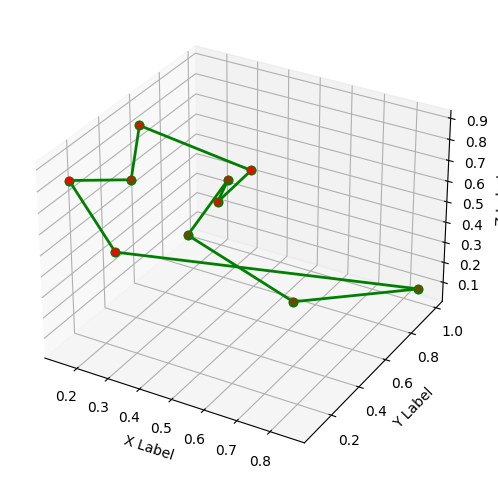

In [2]:

# Example usage: Generate 10 random 3D points and apply the ant colony optimization algorithm with specified parameters.
points = np.random.rand(10, 3) # Generate 10 random 3D points
ant_colony_optimization(points, n_ants=10, n_iterations=100, alpha=1, beta=1, evaporation_rate=0.5, Q=1)